In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
mpl.rcParams['figure.figsize'] = [12,6]

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
df = pd.read_csv('Data/insurance - insurance.csv')
# display info and .head
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


--- Data from the Kaggle website and I will be studying US Health Insurance.

# Begin the Hypothesis Testing for Question 1
- Q1. Do smokers have higher insurance charges than non-smokers?

- Null Hypothesis: There is no difference between smokers and non- smokers
- Alternate Hypothesis: There is a difference between smokers and non- smokers

I will be running the 2 sample ttest for this hypothesis because I am studying two different groups.

In [4]:
## Separate the 2 groups into 2 varaibles
grp_yes = df.loc[ df['smoker']=='yes']
grp_yes
grp_no = df.loc[ df['smoker']!='yes']
grp_no

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [5]:
smoker_charge = grp_yes['charges']

In [6]:
non_smoker_charge = grp_no['charges']

In [7]:
## check yes group for outliers using z-score >3 rule.
idx_outliers_yes = np.abs(stats.zscore(smoker_charge)) > 3
idx_outliers_yes.sum()

0

In [8]:
## check no group for outliers using z-score >3 rule.
idx_outliers_no = np.abs(stats.zscore(non_smoker_charge)) > 3
idx_outliers_no.sum()

24

In [9]:
stats.normaltest(non_smoker_charge)

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

In [10]:
stats.normaltest(smoker_charge)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [11]:
stats.levene(non_smoker_charge, smoker_charge)

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [12]:
stats.ttest_ind(non_smoker_charge,smoker_charge, equal_var=False)


Ttest_indResult(statistic=-32.751887766341824, pvalue=5.88946444671698e-103)

In [13]:
result = stats.levene(non_smoker_charge,smoker_charge)
result

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [14]:
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")


p-value=0.0000000000
Significant: True


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


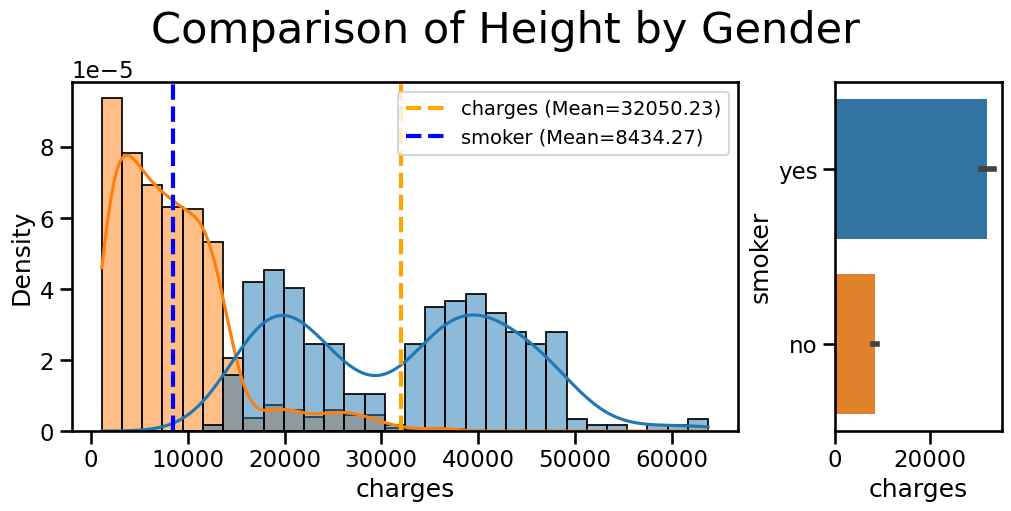

In [16]:
smoker_palette={'Male':'dodgerblue', "Female":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax)

ax.axvline(np.mean(smoker_charge), ls='--',lw=3, 
           label=f"charges (Mean={np.mean(smoker_charge):.2f})",color='orange')

ax.axvline(np.mean(non_smoker_charge), ls='--', lw=3, 
           label=f"smoker (Mean={np.mean(non_smoker_charge):.2f})",color='blue')

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='charges',y='smoker',ax = ax_bar)
fig.suptitle('Comparison of Height by Gender',fontsize='xx-large');

-- Looking at my pvalue and the graph, I can conclude that there is a difference between smokers and non-smokers. So I reject my null hypothesis. 

# Begin the Hypothesis Testing for Question 2

- Q2. Are men more likely to smoke than women?

- Null Hypothesis: There is no difference between males and females
- Alternate Hypothesis: There is a difference between males and females

I will be running the chi squared test for this hypothesis because I am studying two different groups.

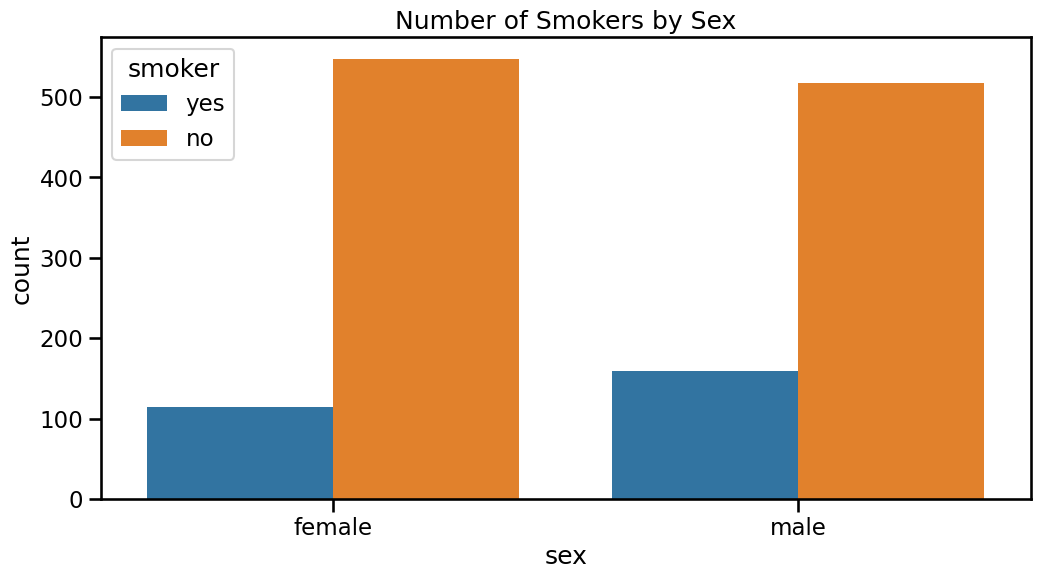

In [24]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [26]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [27]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [28]:
print(p)
p<.05

0.006548143503580696


True

# Begin the Hypothesis Testing for Question 3
- Q3. Do different regions have different charges, on average?

- Null Hypothesis: There is no difference between regions
- Alternate Hypothesis: There is a difference between regions.

I will be running the ANOVA test due to the fact there is more than two regions being studying.

In [ ]:
sns.barplot(data=df, x='region',y='charges');

In [ ]:
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

In [ ]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

In [ ]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

In [ ]:
stats.levene(groups['southwest'],
            groups['southeast'],
            groups['northwest'],
            groups['northeast'])

In [ ]:
stats.levene(*groups.values())

In [ ]:
result = stats.f_oneway( *groups.values())
result

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [ ]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

--- Due to the graph and the pvalue, I can reject my null hypothesis because there is a significant difference between regions for insurance charges.